In [1]:
%load_ext autoreload
%autoreload 2

In [38]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

from src.plot import show
from src.datautils import train_val_test_partition
from src.datasources import spacenet7_index, wotus_index, S2_BANDS12, S2_BANDS13, PS_BANDS

---

# SpaceNet7

## Using the SpaceNet7 image index from `datasources`

The full index:

In [3]:
df_spacenet7 = spacenet7_index(folder_s2="S2L2A", trigger_download_if_not_exists=True)
df_spacenet7

path  \
sat      scene                        datetime                                                        
planet   L15-0331E-1257N_1327_3160_13 2018-01-01  /data/spacenet/train/L15-0331E-1257N_1327_3160...   
                                      2018-02-01  /data/spacenet/train/L15-0331E-1257N_1327_3160...   
                                      2018-03-01  /data/spacenet/train/L15-0331E-1257N_1327_3160...   
                                      2018-04-01  /data/spacenet/train/L15-0331E-1257N_1327_3160...   
                                      2018-05-01  /data/spacenet/train/L15-0331E-1257N_1327_3160...   
...                                                                                             ...   
sentinel L15-1848E-0793N_7394_5018_13 2020-01-23  /data/spacenet/train/L15-1848E-0793N_7394_5018...   
                                      2020-01-26  /data/spacenet/train/L15-1848E-0793N_7394_5018...   
                                      2020-01-28  /data/spacenet/train/L15-1848E-0793N_7394_5018...   
                                      2020-01-31  /data/spacenet/train/L15-1848E-0793N_7394_5018...   
                                      2020-02-02  /data/spacenet/train/L15-1848E-0793N_7394_5018...   

                                                                                           basename  \
sat      scene                        datetime                                                        
planet   L15-0331E-1257N_1327_3160_13 2018-01-01  global_monthly_2018_01_mosaic_L15-0331E-1257N_...   
                                      2018-02-01  global_monthly_2018_02_mosaic_L15-0331E-1257N_...   
                                      2018-03-01  global_monthly_2018_03_mosaic_L15-0331E-1257N_...   
                                      2018-04-01  global_monthly_2018_04_mosaic_L15-0331E-1257N_...   
                                      2018-05-01  global_monthly_2018_05_mosaic_L15-0331E-1257N_...   
...                                                                                             ...   
sentinel L15-1848E-0793N_7394_5018_13 2020-01-23                                     2020-01-23.tif   
                                      2020-01-26                                     2020-01-26.tif   
                                      2020-01-28                                     2020-01-28.tif   
                                      2020-01-31                                     2020-01-31.tif   
                                      2020-02-02                                     2020-02-02.tif   

                                                  year  month  day  \
sat      scene                        datetime                       
planet   L15-0331E-1257N_1327_3160_13 2018-01-01  2018      1    1   
                                      2018-02-01  2018      2    1   
                                      2018-03-01  2018      3    1   
                                      2018-04-01  2018      4    1   
                                      2018-05-01  2018      5    1   
...                                                ...    ...  ...   
sentinel L15-1848E-0793N_7394_5018_13 2020-01-23  2020      1   23   
                                      2020-01-26  2020      1   26   
                                      2020-01-28  2020      1   28   
                                      2020-01-31  2020      1   31   
                                      2020-02-02  2020      2    2   

                                                                                    cloud_mask_path  \
sat      scene                        datetime                                                        
planet   L15-0331E-1257N_1327_3160_13 2018-01-01  /data/spacenet/train/L15-0331E-1257N_1327_3160...   
                                      2018-02-01  /data/spacenet/train/L15-0331E-1257N_1327_3160...   
                                      2018-03-01  /data/spacenet/train/L15-0331E-1257N_1327_

---

PlanetScope and Sentinel-2 imagery available in this month:

In [4]:
scene = 'L15-0924E-1108N_3699_3757_13'
year = 2019
month = 12

df_spacenet7.query(f"scene=='{scene}' & year=={year} & month=={month}")

path  \
sat      scene                        datetime                                                        
planet   L15-0924E-1108N_3699_3757_13 2019-12-01  /data/spacenet/train/L15-0924E-1108N_3699_3757...   
sentinel L15-0924E-1108N_3699_3757_13 2019-12-04  /data/spacenet/train/L15-0924E-1108N_3699_3757...   
                                      2019-12-09  /data/spacenet/train/L15-0924E-1108N_3699_3757...   
                                      2019-12-14  /data/spacenet/train/L15-0924E-1108N_3699_3757...   
                                      2019-12-19  /data/spacenet/train/L15-0924E-1108N_3699_3757...   
                                      2019-12-24  /data/spacenet/train/L15-0924E-1108N_3699_3757...   
                                      2019-12-29  /data/spacenet/train/L15-0924E-1108N_3699_3757...   

                                                                                           basename  \
sat      scene                        datetime                                                        
planet   L15-0924E-1108N_3699_3757_13 2019-12-01  global_monthly_2019_12_mosaic_L15-0924E-1108N_...   
sentinel L15-0924E-1108N_3699_3757_13 2019-12-04                                     2019-12-04.tif   
                                      2019-12-09                                     2019-12-09.tif   
                                      2019-12-14                                     2019-12-14.tif   
                                      2019-12-19                                     2019-12-19.tif   
                                      2019-12-24                                     2019-12-24.tif   
                                      2019-12-29                                     2019-12-29.tif   

                                                  year  month  day  \
sat      scene                        datetime                       
planet   L15-0924E-1108N_3699_3757_13 2019-12-01  2019     12    1   
sentinel L15-0924E-1108N_3699_3757_13 2019-12-04  2019     12    4   
                                      2019-12-09  2019     12    9   
                                      2019-12-14  2019     12   14   
                                      2019-12-19  2019     12   19   
                                      2019-12-24  2019     12   24   
                                      2019-12-29  2019     12   29   

                                                                                    cloud_mask_path  \
sat      scene                        datetime                                                        
planet   L15-0924E-1108N_3699_3757_13 2019-12-01  /data/spacenet/train/L15-0924E-1108N_3699_3757...   
sentinel L15-0924E-1108N_3699_3757_13 2019-12-04                                               None   
                                      2019-12-09                                               None   
                                      2019-12-14                                               None   
                                      2019-12-19                                               None   
                                      2019-12-24                                               None   
                                      2019-12-29                                               None   

                                                                                    label_mask_path  \
sat      scene                        datetime                                                        
planet   L15-0924E-1108N_3699_3757_13 2019-12-01  /data/spacenet/train/L15-0924E-1108N_3699_3757...   
sentinel L15-0924E-1108N_3699_3757_13 2019-12-04  /data/spacenet/train/L15-0924E-1108N_3699_3757...   
                                      2019-12-09  /data/spacenet/train/L15-0924E-1108N_3699_3757...   
                                      2019-12-14  /data/spacenet/train/L15-0924E-1108N_3699_3757...   
                                      2019-12-19  /data/spacen

---

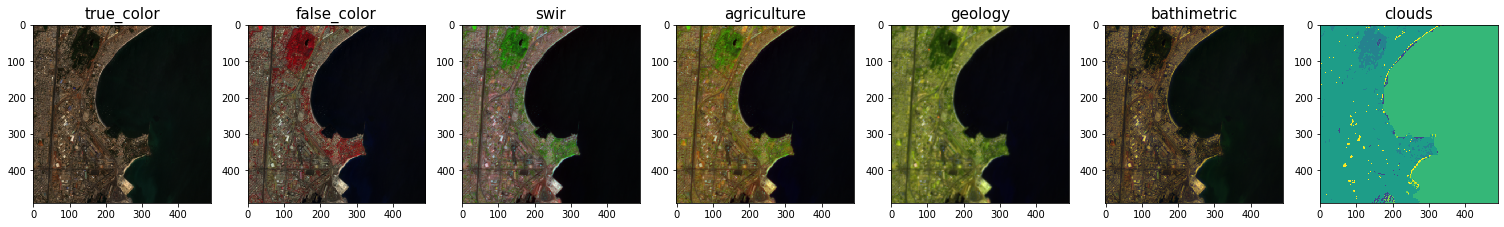

In [5]:
df_sentinel = df_spacenet7.query(f"sat=='sentinel' & scene=='{scene}' & year=={year} & month=={month}")

im = xr.open_rasterio(df_sentinel['path'].iloc[0])

combos = ['true_color', 'false_color', 'swir', 'agriculture', 'geology', 'bathimetric']
show([im[S2_BANDS[c]] for c in combos] + [im[-1]], title=combos + ['clouds'], figsize=3)

Here is a PlanetScope image from the same month.

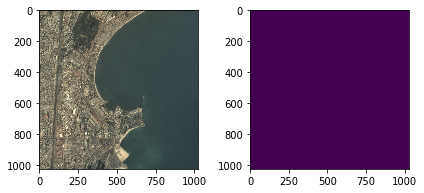

In [6]:
df_planet = df_spacenet7.query(f"sat=='planet' & scene=='{scene}' & year=={year} & month=={month}")

im2 = xr.open_rasterio(df_planet['path'].iloc[0])
cloud2 = xr.open_rasterio(df_planet['cloud_mask_path'].iloc[0])
show([im2, cloud2])

---

## All co-temporal Sentinel imagery

In [7]:
print(f"Days available: {df_sentinel.index.get_level_values('datetime').day.values}")

im1 = [xr.open_rasterio(path)[S2_BANDS['true_color']] for path in df_sentinel['path']]
clouds = [xr.open_rasterio(path)[-1] for path in df_sentinel['path']]

Days available: [ 4  9 14 19 24 29]


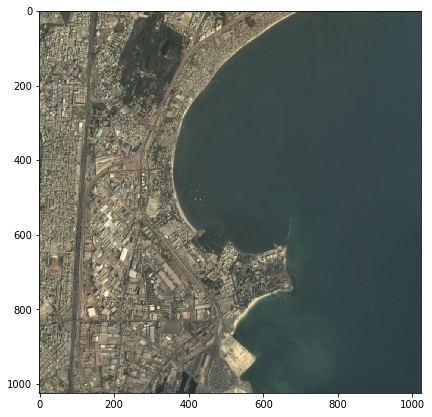

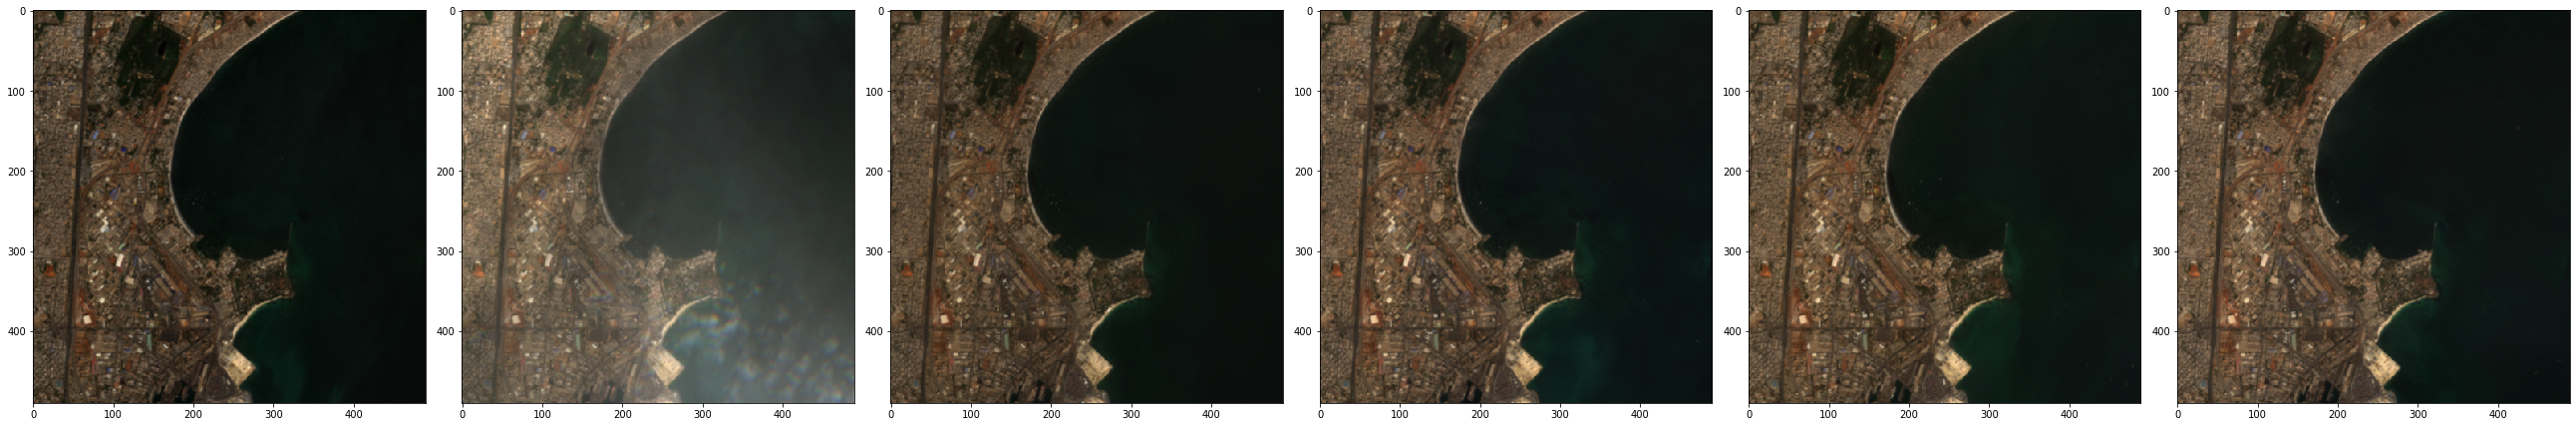

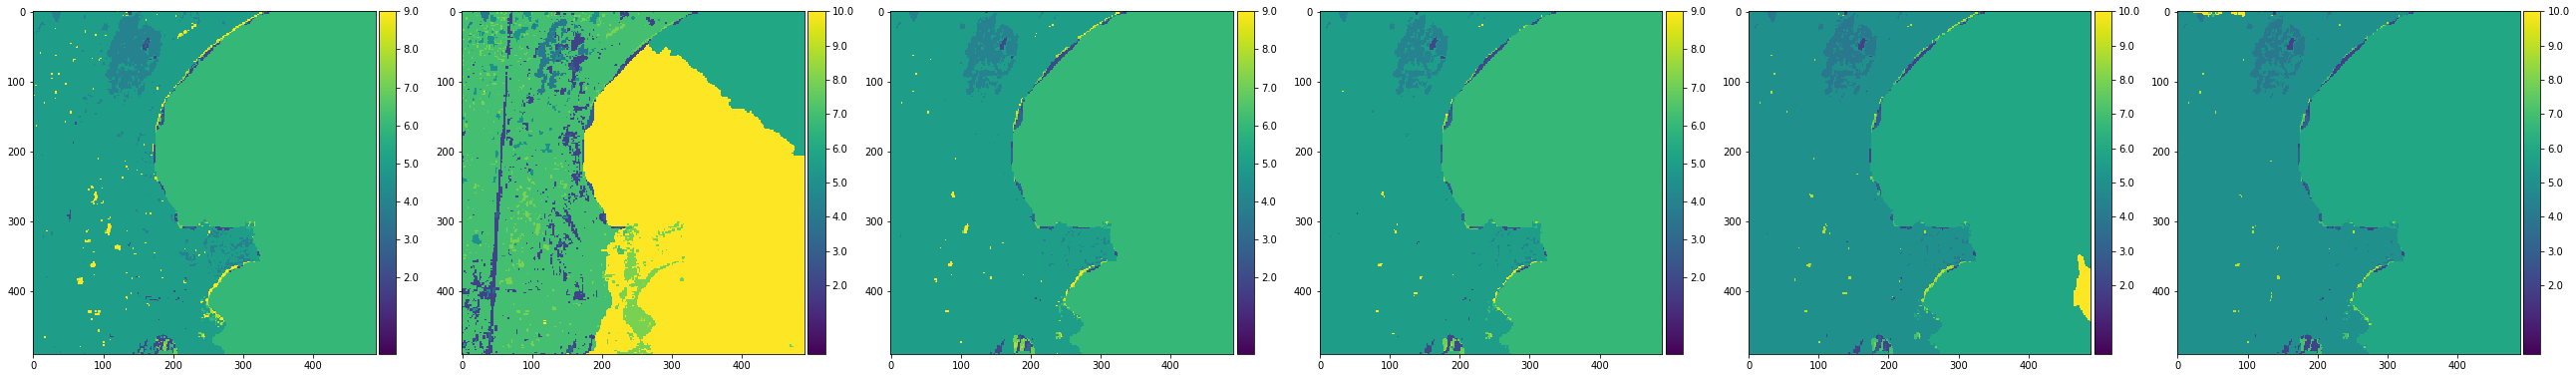

In [10]:
show(im2, figsize=6)

show(im1, figsize=6)
show(clouds, figsize=6, colorbar=True)

## Label masks

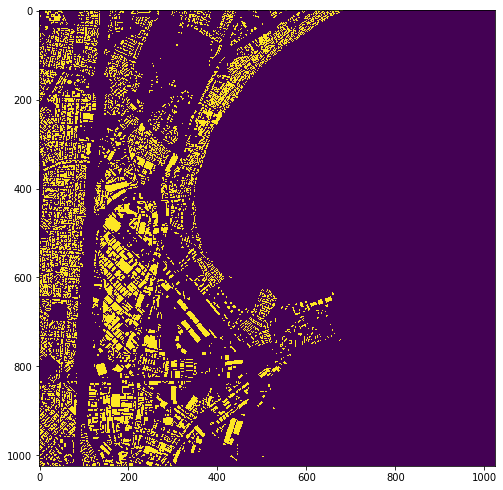

In [9]:
show(xr.open_rasterio(df_planet.iloc[0]['label_mask_path']), figsize=7)

In [10]:
# from ipyleaflet import Map, basemaps, basemap_to_tiles, SplitMapControl, ImageOverlay

# m = Map(center=(42.6824, 365.581), zoom=5)`

# right_layer = ImageOverlay(url=df_planet.iloc[0]['label_mask_path'])
# left_layer = ImageOverlay(url=df_planet.iloc[0]['path'])

# control = SplitMapControl(left_layer=left_layer, right_layer=right_layer)
# m.add_control(control)
# m

---

# WOTUS

## Using the SpaceNet7 image index from `datasources`

The full index:

In [4]:
df_wotus = wotus_index(folder_s2='S2', folder_planet='images', trigger_download_if_not_exists=True)
df_wotus

path  \
sat      scene        datetime                                                       
planet   ID_0         2019-10-11      /data/wotus/train/ID_0/images/2019-10-11.tif   
         ID_1         2019-09-25      /data/wotus/train/ID_1/images/2019-09-25.tif   
         ID_2         2019-10-14      /data/wotus/train/ID_2/images/2019-10-14.tif   
         SD_0         2018-06-05      /data/wotus/train/SD_0/images/2018-06-05.tif   
         SD_1         2018-06-08      /data/wotus/train/SD_1/images/2018-06-08.tif   
...                                                                            ...   
sentinel UCWest_Focus 2018-09-07  /data/wotus/train/UCWest_Focus/S2/2018-09-07.tif   
                      2018-09-12  /data/wotus/train/UCWest_Focus/S2/2018-09-12.tif   
                      2018-09-17  /data/wotus/train/UCWest_Focus/S2/2018-09-17.tif   
                      2018-09-22  /data/wotus/train/UCWest_Focus/S2/2018-09-22.tif   
                      2018-09-27  /data/wotus/train/UCWest_Focus/S2/2018-09-27.tif   

                                        basename  split  
sat      scene        datetime                           
planet   ID_0         2019-10-11  2019-10-11.tif   test  
         ID_1         2019-09-25  2019-09-25.tif  train  
         ID_2         2019-10-14  2019-10-14.tif  train  
         SD_0         2018-06-05  2018-06-05.tif  train  
         SD_1         2018-06-08  2018-06-08.tif  train  
...                                          ...    ...  
sentinel UCWest_Focus 2018-09-07  2018-09-07.tif   test  
                      2018-09-12  2018-09-12.tif   test  
                      2018-09-17  2018-09-17.tif   test  
                      2018-09-22  2018-09-22.tif   test  
                      2018-09-27  2018-09-27.tif   test  

[225 rows x 3 columns]

---

PlanetScope and Sentinel-2 imagery of `ID_0` from `October 2019`:

In [6]:
scene = 'ID_0'
date_range = pd.date_range(start='2019-10-01', end='2019-10-31')

df_wotus = df_wotus[df_wotus.index.get_level_values('datetime').isin(date_range)]
df_wotus = df_wotus.query(f"scene == '{scene}'")
df_wotus

path  \
sat      scene datetime                                                   
planet   ID_0  2019-10-11  /data/wotus/train/ID_0/images/2019-10-11.tif   
sentinel ID_0  2019-10-01      /data/wotus/train/ID_0/S2/2019-10-01.tif   
               2019-10-04      /data/wotus/train/ID_0/S2/2019-10-04.tif   
               2019-10-06      /data/wotus/train/ID_0/S2/2019-10-06.tif   
               2019-10-09      /data/wotus/train/ID_0/S2/2019-10-09.tif   
               2019-10-11      /data/wotus/train/ID_0/S2/2019-10-11.tif   
               2019-10-14      /data/wotus/train/ID_0/S2/2019-10-14.tif   
               2019-10-16      /data/wotus/train/ID_0/S2/2019-10-16.tif   
               2019-10-19      /data/wotus/train/ID_0/S2/2019-10-19.tif   
               2019-10-21      /data/wotus/train/ID_0/S2/2019-10-21.tif   
               2019-10-24      /data/wotus/train/ID_0/S2/2019-10-24.tif   
               2019-10-26      /data/wotus/train/ID_0/S2/2019-10-26.tif   
               2019-10-29      /data/wotus/train/ID_0/S2/2019-10-29.tif   
               2019-10-31      /data/wotus/train/ID_0/S2/2019-10-31.tif   

                                 basename split  
sat      scene datetime                          
planet   ID_0  2019-10-11  2019-10-11.tif  test  
sentinel ID_0  2019-10-01  2019-10-01.tif  test  
               2019-10-04  2019-10-04.tif  test  
               2019-10-06  2019-10-06.tif  test  
               2019-10-09  2019-10-09.tif  test  
               2019-10-11  2019-10-11.tif  test  
               2019-10-14  2019-10-14.tif  test  
               2019-10-16  2019-10-16.tif  test  
               2019-10-19  2019-10-19.tif  test  
               2019-10-21  2019-10-21.tif  test  
               2019-10-24  2019-10-24.tif  test  
               2019-10-26  2019-10-26.tif  test  
               2019-10-29  2019-10-29.tif  test  
               2019-10-31  2019-10-31.tif  test

---

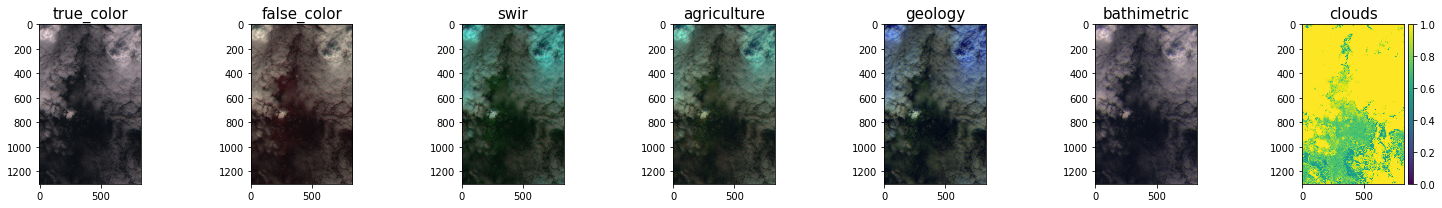

In [56]:
im = xr.open_rasterio(df_wotus.loc['sentinel']['path'].iloc[0])
combos = ['true_color', 'false_color', 'swir', 'agriculture', 'geology', 'bathimetric']
show([im[S2_BANDS13[c]] for c in combos] + [im[-1]], title=combos + ['clouds'], figsize=3, colorbar=True)

Here is a PlanetScope image from the same month.

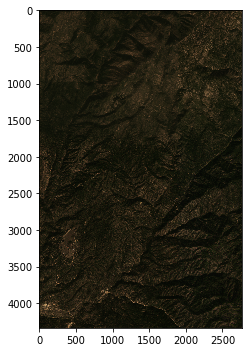

In [41]:
im2 = xr.open_rasterio(df_wotus.loc['planet']['path'].iloc[0])
show(im2[PS_BANDS['true_color']], figsize=5)

---

## All co-temporal Sentinel imagery

In [79]:
df_sentinel = df_wotus.loc['sentinel']
print(f"Days available: {df_sentinel.index.get_level_values('datetime').day.values}")

im1 = [xr.open_rasterio(path)[S2_BANDS13['true_color'], :500, :500] for path in df_sentinel['path']]
clouds = [xr.open_rasterio(path)[-1, :500, :500] - 1 for path in df_sentinel['path']]

Days available: [ 1  4  6  9 11 14 16 19 21 24 26 29 31]


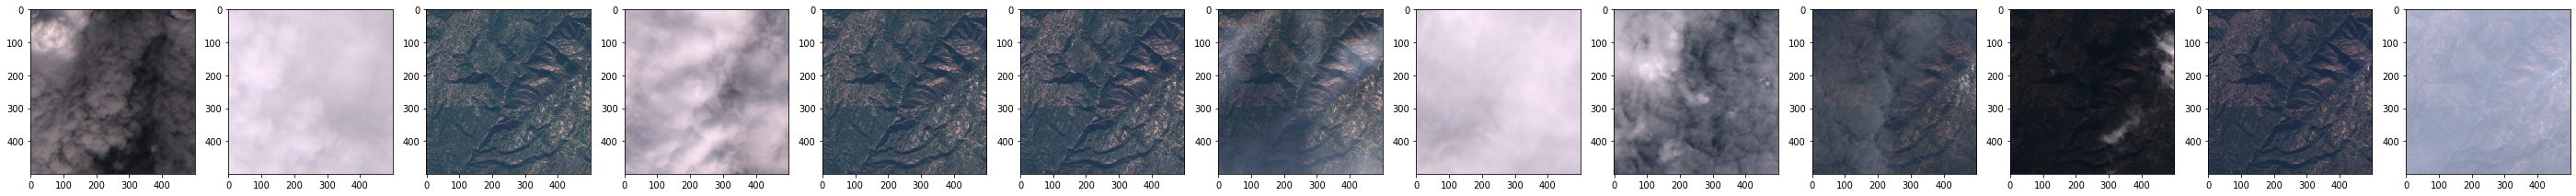

In [80]:
show(im1)

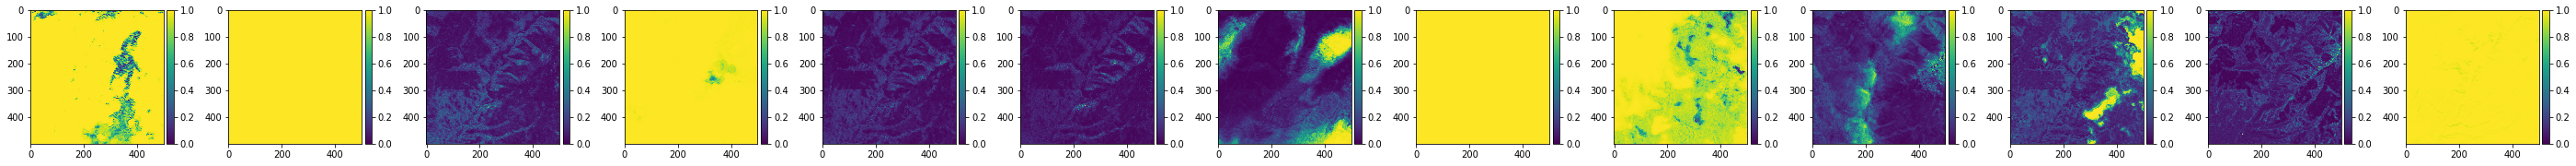

In [81]:
show(clouds, colorbar=True)

## Label masks (**TODO**)